In [510]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # For plotting
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

from joblib import dump, load

# The Dataset

In [6]:
df = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")

# Hold up dataset

In [7]:
splitsize = 0.2
split = len(df) * splitsize

traindf = df.loc[split:]
testdf = df.loc[:split]

In [8]:
traindf.shape, testdf.shape

((614, 9), (154, 9))

In [9]:
# Let take a look at the dataset
traindf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
154,8,188,78,0,0,47.9,0.137,43,1
155,7,152,88,44,0,50.0,0.337,36,1
156,2,99,52,15,94,24.6,0.637,21,0
157,1,109,56,21,135,25.2,0.833,23,0
158,2,88,74,19,53,29.0,0.229,22,0


The dataset contains the following columns
1. Number of Pregnancies
2. Glucose level 
3. Blood Pressure
4. Skin thickness
5. Insulin level
6. BMI levels
7. Diabetes Pedigree Function
8. Age

In [10]:
# The datatypes of each or the values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Great for us the dataset does not have any missing values

In [11]:
# Lets check the correlation of the dataset
correlation = df.corr()

correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

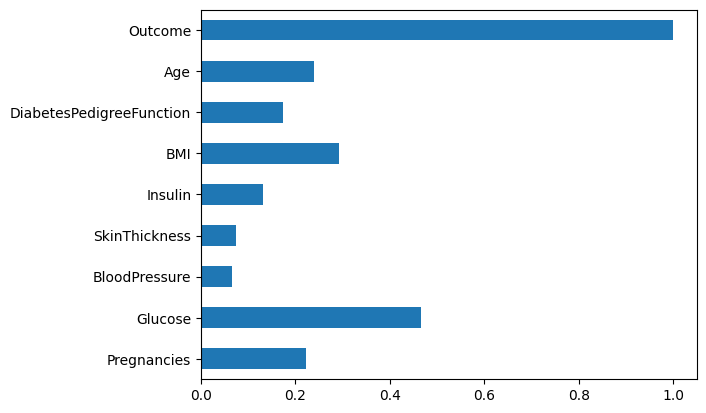

In [12]:
correlation['Outcome'].plot(kind = 'barh')

Glucose is the most correlated with the other variables

In [13]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [30]:
df.shape

(768, 9)

# Explore the features

## Pregnancies

<Axes: title={'center': 'Pregnancies'}, xlabel='Outcome'>

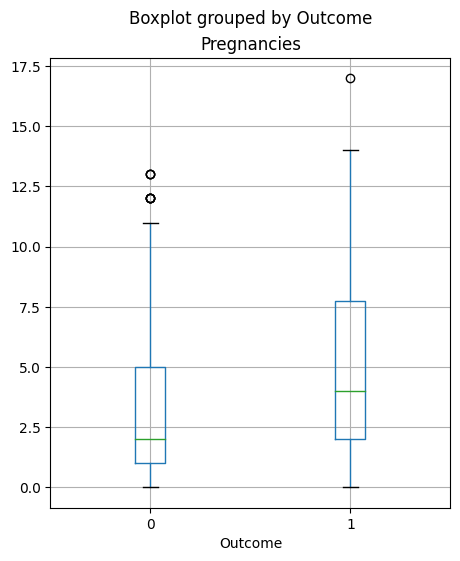

In [349]:
# Pregnancies
traindf.boxplot(column='Pregnancies', by='Outcome', figsize=(5,6))

I can see two outliers. We would remove it

In [365]:
traindf.shape

(614, 9)

<Axes: title={'center': 'Pregnancies'}, xlabel='Outcome'>

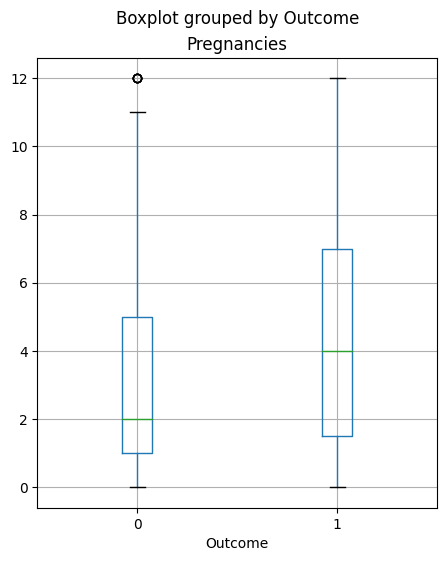

In [370]:
Pregnancies_removed_outlier = ~(((traindf['Pregnancies'] > 12.0) & (traindf['Outcome'] == 0)) | ((traindf['Pregnancies'] > 12.5) & (traindf['Outcome'] == 1)))
# Pregnancies_removed_outlier = ~(traindf['Pregnancies'] > 17)
newdf = traindf[Pregnancies_removed_outlier]
newdf.boxplot(column='Pregnancies', by='Outcome', figsize=(5,6))

In [371]:
newdf.shape

(604, 9)

## Age

<Axes: title={'center': 'Age'}, xlabel='Outcome'>

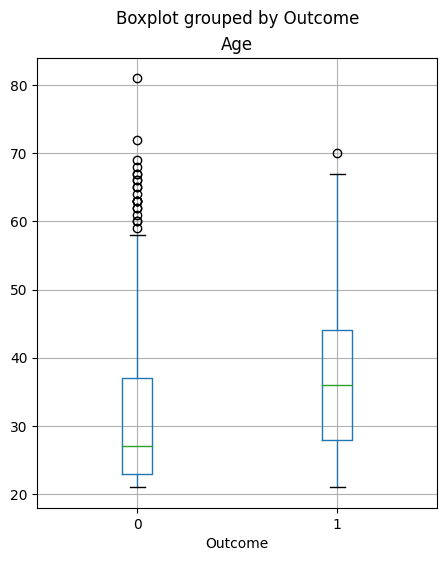

In [409]:
# Pregnancies
traindf.boxplot(column='Age', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'Age'}, xlabel='Outcome'>

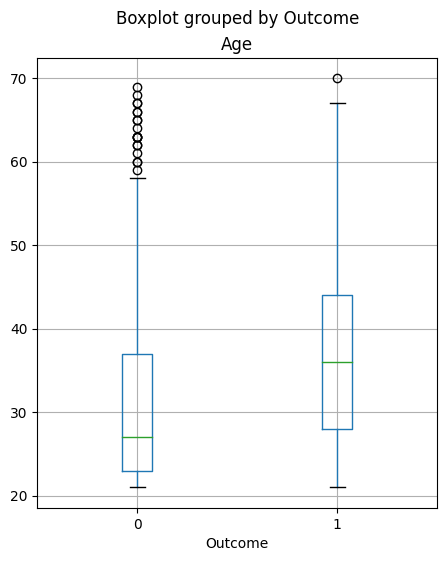

In [431]:
age_removed_outlier = ~(((traindf['Age'] > 70))) 
newestdf = traindf.loc[age_removed_outlier]
newestdf.boxplot(column='Age', by='Outcome', figsize=(5,6))

In [432]:
newestdf.shape

(612, 9)

## DiabetesPedigreeFunction

<Axes: title={'center': 'DiabetesPedigreeFunction'}, xlabel='Outcome'>

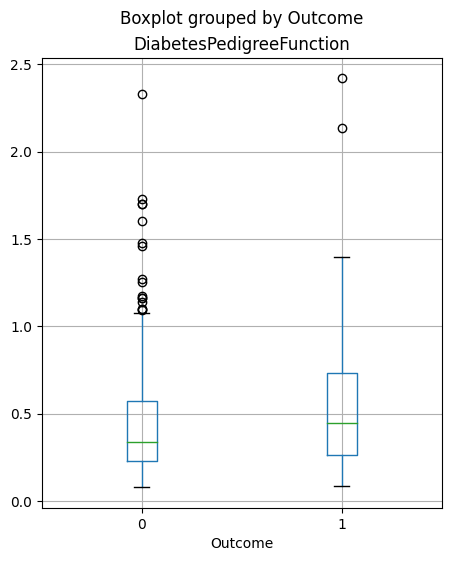

In [473]:
# Pregnancies
traindf.boxplot(column='DiabetesPedigreeFunction', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'DiabetesPedigreeFunction'}, xlabel='Outcome'>

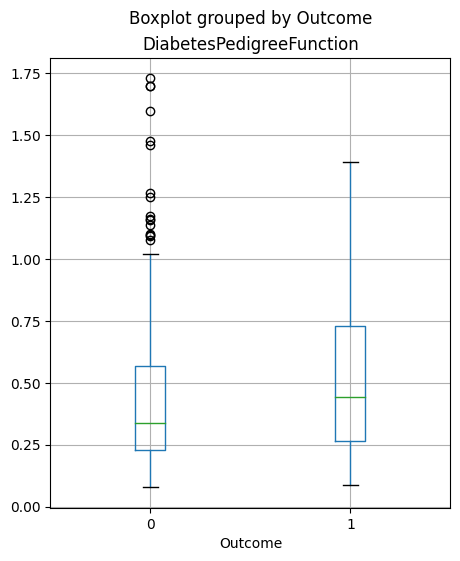

In [474]:
DiabetesPedigreeFunction_removed_outlier = ~(traindf['DiabetesPedigreeFunction'] > 2.0)
newdf = traindf[DiabetesPedigreeFunction_removed_outlier]
newdf.boxplot(column='DiabetesPedigreeFunction', by='Outcome', figsize=(5,6))

## BMI

<Axes: title={'center': 'BMI'}, xlabel='Outcome'>

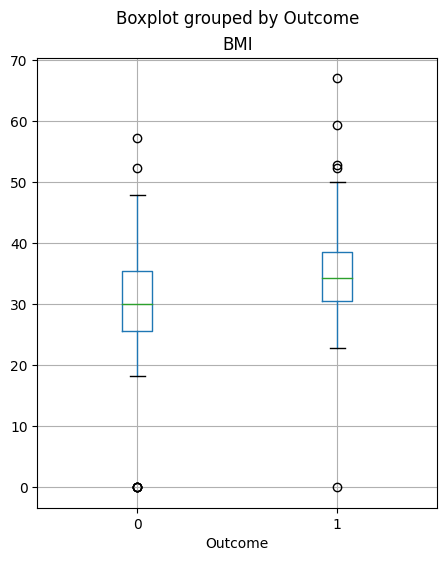

In [489]:
# Pregnancies
traindf.boxplot(column='BMI', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'BMI'}, xlabel='Outcome'>

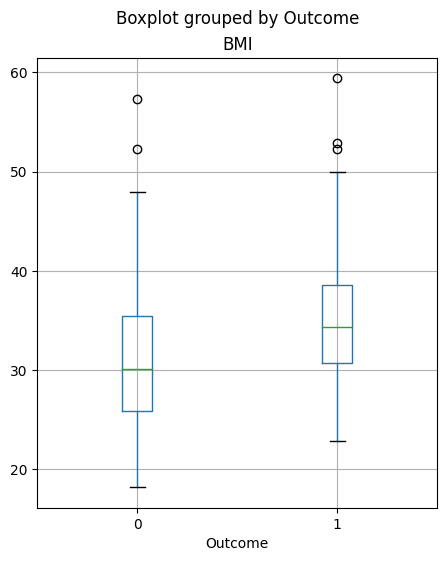

In [609]:
BMI_removed_outlier = ~(traindf['BMI'] > 60) & (traindf['BMI'] > 10)
newdf = traindf[BMI_removed_outlier]
newdf.boxplot(column='BMI', by='Outcome', figsize=(5,6))

In [610]:
newdf.shape

(607, 9)

## Insulin

<Axes: title={'center': 'Insulin'}, xlabel='Outcome'>

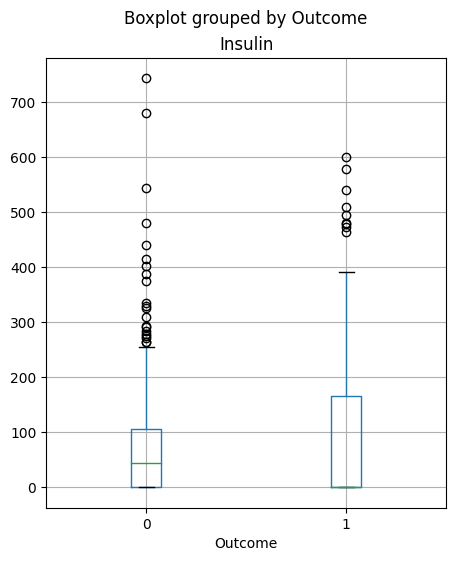

In [437]:
# Pregnancies
traindf.boxplot(column='Insulin', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'Insulin'}, xlabel='Outcome'>

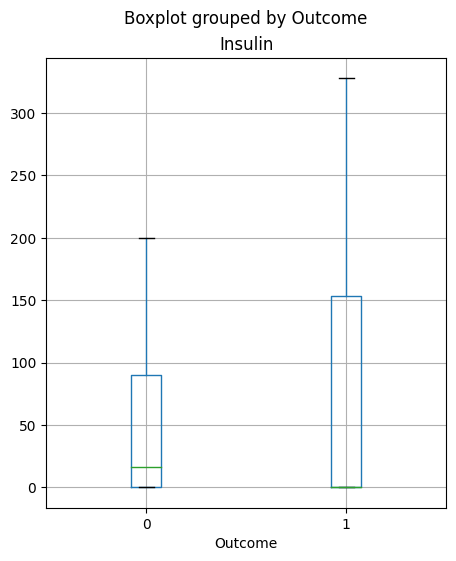

In [438]:
Insulin_removed_outlier = ~(((traindf['Insulin'] > 200) & (traindf['Outcome'] == 0)) | ((traindf['Insulin'] > 350) & (traindf['Outcome'] == 1)))
newdf = traindf[Insulin_removed_outlier]
newdf.boxplot(column='Insulin', by='Outcome', figsize=(5,6))

## SkinThickness

<Axes: title={'center': 'SkinThickness'}, xlabel='Outcome'>

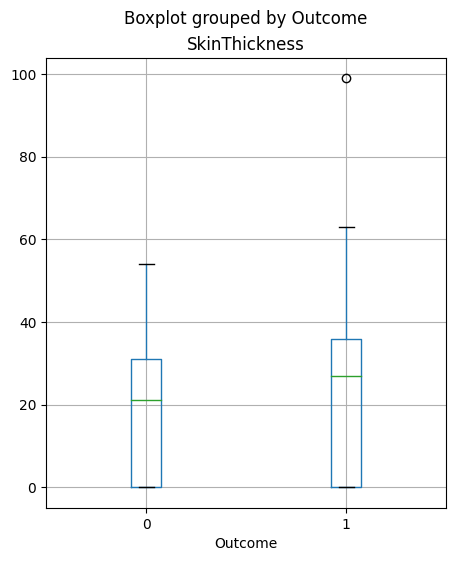

In [439]:
# Pregnancies
traindf.boxplot(column='SkinThickness', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'SkinThickness'}, xlabel='Outcome'>

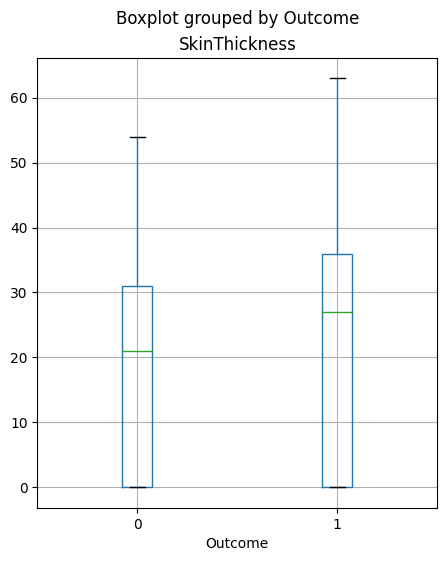

In [440]:
SkinThickness_removed_outlier = ~((traindf['SkinThickness'] > 95) & (traindf['Outcome'] == 1))
newdf = traindf[SkinThickness_removed_outlier]
newdf.boxplot(column='SkinThickness', by='Outcome', figsize=(5,6))

## BloodPressure

<Axes: title={'center': 'BloodPressure'}, xlabel='Outcome'>

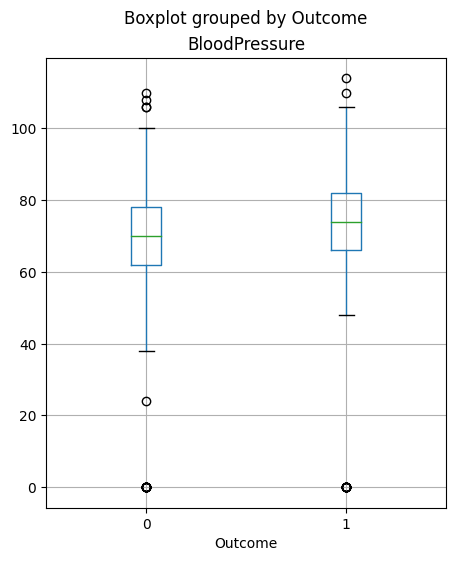

In [441]:
# Pregnancies
traindf.boxplot(column='BloodPressure', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'BloodPressure'}, xlabel='Outcome'>

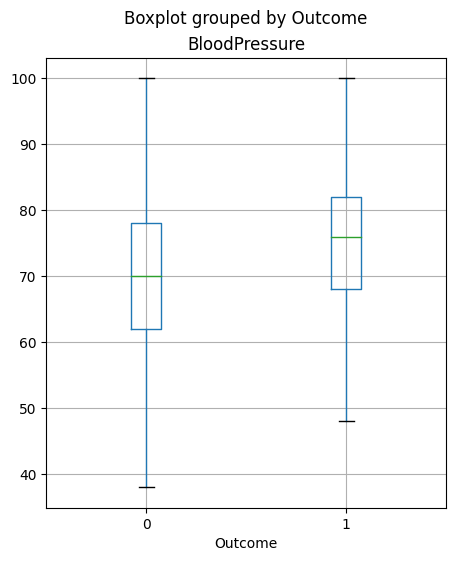

In [442]:
BloodPressure_removed_outlier = ~((traindf['BloodPressure'] > 100) | (traindf['BloodPressure'] < 25))
newdf = traindf[BloodPressure_removed_outlier]
newdf.boxplot(column='BloodPressure', by='Outcome', figsize=(5,6))

## Glucose

<Axes: title={'center': 'Glucose'}, xlabel='Outcome'>

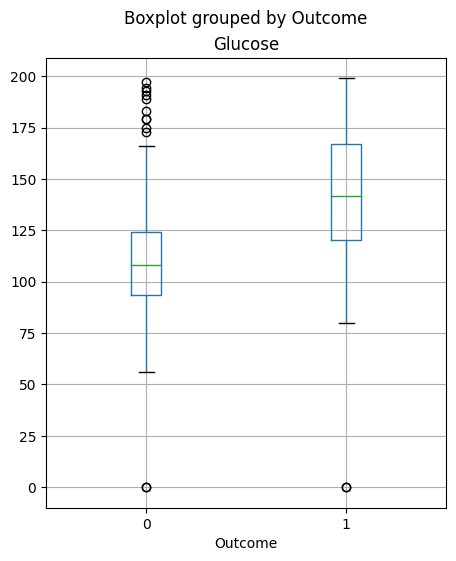

In [443]:
# Pregnancies
traindf.boxplot(column='Glucose', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'Glucose'}, xlabel='Outcome'>

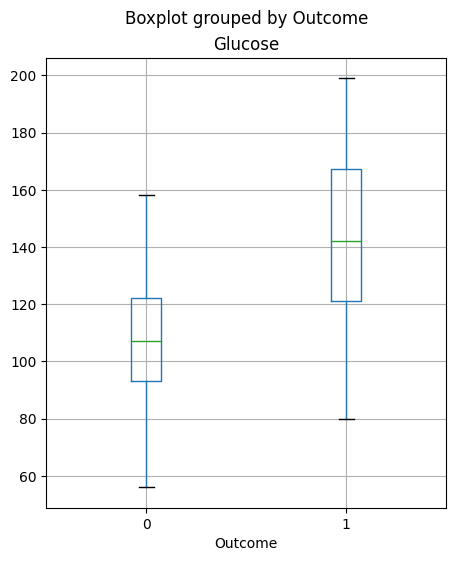

In [444]:
Glucose_removed_outlier = ~(((traindf['Glucose'] > 160) & (traindf['Outcome'] == 0)) | (traindf['Glucose'] < 10))
newdf = traindf[Glucose_removed_outlier]
newdf.boxplot(column='Glucose', by='Outcome', figsize=(5,6))

## Pregnancies

<Axes: title={'center': 'Pregnancies'}, xlabel='Outcome'>

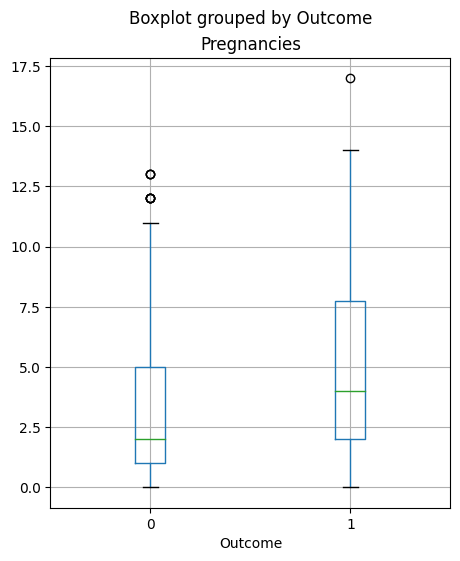

In [445]:
# Pregnancies
traindf.boxplot(column='Pregnancies', by='Outcome', figsize=(5,6))

<Axes: title={'center': 'Pregnancies'}, xlabel='Outcome'>

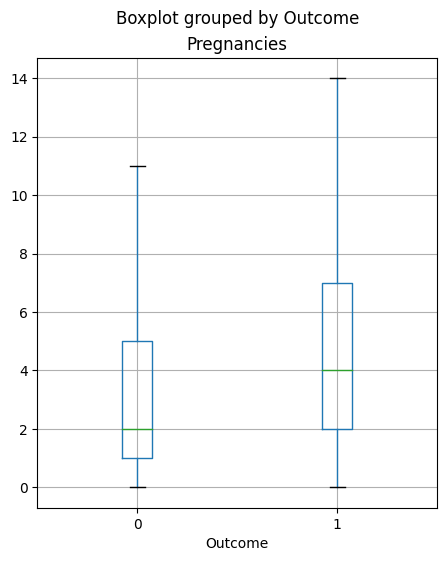

In [446]:
Pregnancies_removed_outlier = ~(((traindf['Pregnancies'] > 11) & (traindf['Outcome'] == 0)) | ((traindf['Pregnancies'] > 15) & (traindf['Outcome'] == 1)))
newdf = traindf[Pregnancies_removed_outlier]
newdf.boxplot(column='Pregnancies', by='Outcome', figsize=(5,6))

# Resample the Data

In [520]:
outlierdf = traindf[BMI_removed_outlier]
outlierdf.shape

(607, 9)

In [531]:
outlierdf['Outcome'].value_counts()

Outcome
0    395
1    212
Name: count, dtype: int64

In [586]:
df_0 = outlierdf[(outlierdf['Outcome']==0)]

df_1 = outlierdf[(outlierdf['Outcome']==1)]
df_1 = resample(df_1,
                replace=True,    # sample with replacement          
                n_samples= 350, # to match majority class
                random_state=42)  # reproducible results

In [587]:
resampleddf = pd.concat([df_0, df_1])
resampleddf['Outcome'].value_counts()

Outcome
0    400
1    350
Name: count, dtype: int64

In [588]:
resampleddf = resampleddf.sample(frac = 1).reset_index(drop=True)
resampleddf

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,10,90,85,32,0,34.9,0.825,56,1
1,5,123,74,40,77,34.1,0.269,28,0
2,0,123,88,37,0,35.2,0.197,29,0
3,9,134,74,33,60,25.9,0.460,81,0
4,6,125,76,0,0,33.8,0.121,54,1
...,...,...,...,...,...,...,...,...,...
745,5,103,108,37,0,39.2,0.305,65,0
746,9,120,72,22,56,20.8,0.733,48,0
747,1,81,74,41,57,46.3,1.096,32,0
748,0,181,88,44,510,43.3,0.222,26,1


# Prepare the Model

In [589]:
X = resampleddf.drop(['Outcome'], axis = 1)
y = resampleddf['Outcome']

In [590]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

## Make the Base Model

In [596]:
model = RandomForestClassifier(random_state = 32)
model.fit(Xtrain, ytrain)

RandomForestClassifier(random_state=32)

In [597]:
model.score(Xtest, ytest)

0.8670212765957447

0.8670212765957447

# Model 2: Standard Scaler

In [598]:
scaledModel = Pipeline([("Scaler", StandardScaler()), 
                        ("Model", RandomForestClassifier(random_state = 32))])

In [599]:
scaledModel.fit(Xtrain, ytrain)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Model', RandomForestClassifier(random_state=32))])

In [600]:
scaledModel.score(Xtest, ytest)

0.8670212765957447

0.8670212765957447

## Evaluate the model 

In [601]:
X_t = testdf.drop(['Outcome'], axis = 1)
y_true = testdf['Outcome']

In [606]:
y_pred = model.predict(X_t)

In [607]:
print(classification_report(y_pred=y_pred, y_true=y_true))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



ScaledModel = 0.77 <br>
Model = 0.77

In [608]:
print(confusion_matrix(y_pred=y_pred, y_true=y_true))

[[85 15]
 [20 34]]


## 

In [612]:
dump(model, 'filename.joblib') 

['filename.joblib']